In [16]:
#collab with Katharine Bancroft, Shoaib Shamsi, and Xia Shufan
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import interpolate
import functools

#trying to make it the latex font stuff
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

#importing the txt file
cmb_data = np.loadtxt('wolthuis_cmb_data_hw6.txt')
print("part a")

part a


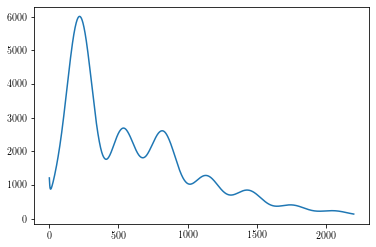

In [2]:
plt.plot(cmb_data[:, 0], cmb_data[: ,1])

In [3]:
#saving these for future use
col0, col1 = cmb_data[:, 0], cmb_data[: ,1]

In [4]:
#making rounded indices
indices = np.linspace(0, len(cmb_data[:,0]) -1 , 200)
round_ind = [int(i) for i in indices]

In [5]:
#setting up these arrays
intrp = col1[round_ind]
index = col0[round_ind]

In [6]:
#interpolating points
def f(x):
    x_points = index
    y_points = intrp

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

In [8]:
intrp_val = f(col0)

Text(0.5, 1.0, 'Interpolated vs. Actual Power Spectrum of CMB')

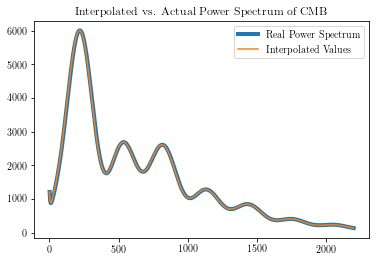

In [33]:
plt.plot(cmb_data[:, 0], cmb_data[: ,1], linewidth = 4, label = "Real Power Spectrum")
plt.plot(intrp_val, label = "Interpolated Values")
plt.legend()
plt.title("Interpolated vs. Actual Power Spectrum of CMB")

/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


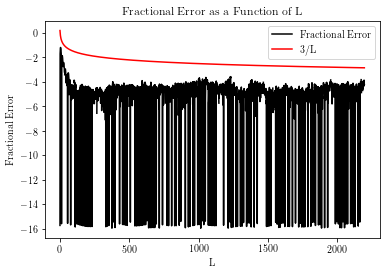

In [10]:
#making plots
l = []
f_err = []
x = []

for i in range (0, len(col0)-1):
    err = np.abs(intrp_val[i] - col1[i]) / col1[i]
    x.append(i)
    f_err.append(err)
    l.append(3/(i+2))  


plt.plot(x,np.log10(f_err), label = 'Fractional Error', color = 'k')
plt.plot(x, np.log10(l), label = '3/L', color = 'r')

plt.ion
plt.xlabel('L')
plt.ylabel('Fractional Error')
plt.title('Fractional Error as a Function of L')
plt.legend()
plt.show()

In [11]:
print('part b')
intrp_val

#making a new list for the values with l stripped away, multiplied by pi
c_list = []
l_list = []

for i in range(1,2199):
    val = 2*np.pi* intrp_val[i] / (i*(i+1))
    c_list.append(val)
    l_list.append(i)

part b


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


Text(0.5, 1.0, 'Slope of $C_l^{TT}$ over $l$')

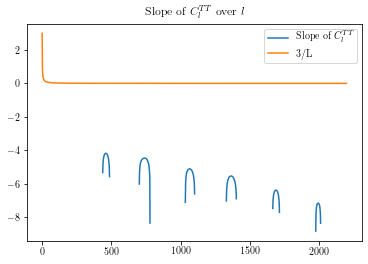

In [39]:
#setting up a list for the derivative of the interpolated values
der_c = []
l_mod = []
Trioverl = []
for i in range (1,len(l_list)):
    val = c_list[i] - c_list[i-1]
    drioverl = 3/i
    der_c.append(val)
    l_mod.append(i)
    Trioverl.append(drioverl)
    
    

plt.plot(l_mod,np.log10(der_c), label="Slope of $C_l^{TT}$")
plt.plot(l_mod, Trioverl, label = "3/L")
plt.legend()
plt.title("Slope of $C_l^{TT}$ over $l$")

In [35]:
der_c

[-2457.3699991814183,
 -596.4763016369312,
 -231.56038331971104,
 -112.34268427786367,
 -62.286930573025955,
 -37.777826662869714,
 -24.44986501404007,
 -16.62601233882978,
 -11.75723974538807,
 -8.584753179979195,
 -6.439205286386233,
 -4.942948904807199,
 -3.8722979656114376,
 -3.0892625666862585,
 -2.5057288187512015,
 -2.063736591912299,
 -1.724164324582926,
 -1.46000168222786,
 -1.252223253447264,
 -1.0871870551843141,
 -0.9549537763209468,
 -0.847348889590398,
 -0.7560890666814917,
 -0.6774284762335441,
 -0.6091940093049928,
 -0.5496553542624874,
 -0.4974220575846857,
 -0.45136724653583116,
 -0.4105704512333368,
 -0.3742742823903962,
 -0.34185127899373047,
 -0.31277830231634063,
 -0.28669769264423817,
 -0.26352776555488955,
 -0.24294660430616144,
 -0.22460695743023074,
 -0.20821567618597747,
 -0.19352416165380593,
 -0.18032068824045577,
 -0.16842419943455766,
 -0.15767926602950055,
 -0.14795196773340624,
 -0.13912651244653862,
 -0.1310832103282582,
 -0.12366423752659106,
 -0.1167

In [13]:
print('part c')

part c


In [55]:
def simplified_simp_int(list):
    
    #defining the number of bins for future looping stuff
    h = 1/len(list)
    
    #making lists for even and odd  values
    evnval = []
    oddval = []
    
    a = 0
    
    #beginning the loop with a for - if statement
    for i in range(a,len(list)):
        #setting up an if statement to get seperate odd and even summations
        if (i%2) == 0:
            evn = float(list[i]*h)
            evnval.append(evn)
        else:
            odd = float(list[i]*h)
            oddval.append(odd)
    
    #using lambda functions to get the summation of the even and the odd values
    sumodd = functools.reduce(lambda k,l: k+l, oddval)
    sumevn = functools.reduce(lambda k,l: k+l, evnval)
    
    #getting the final integral values
    integral = (h/3)*(list[a] + list[-1] + (4*sumodd) + (2*sumevn))
    return integral

In [56]:
Int_Val = simplified_simp_int(c_list) / (2*np.pi)

In [57]:
print("The integrated value is", Int_Val)

The integrated value is 0.08711936520996469
